# Splitting on the Best Scores & Discrete Regression

In [1]:
%run Coding_Gini_Entropy_MSE.ipynb
import _plotting
# Allows us to use the functions we wrote

import matplotlib.pyplot as plt
import numpy
import pandas
import sklearn.tree

#### We can use the Gini and Entropy to decide when the best split is for a given set of elements. The higher the value, the better the split!

In [2]:
elements = ['A', 'A', 'A', 'C', 'B', 'C']

print(list(construct_dict_count(elements).values()))
print(calculate_gini(elements))
print(calculate_entropy(elements))

for i in range(len(elements)):
    print("*"*10)
    # Split list in two at each index
    left = elements[:i]
    right = elements[i:]
    print(left, right)
    weighted_gini = calculate_weighted_auxillary(elements, i, calculate_gini)
    print("Weighted Gini:", weighted_gini)
    weighted_entropy = calculate_weighted_auxillary(elements, i, calculate_entropy)
    print("Weighted Entropy:", weighted_entropy)

[3, 2, 1]
0.6111111111111112
1.4591479170272448
**********
[] ['A', 'A', 'A', 'C', 'B', 'C']
Weighted Gini: 0.6111111111111112
Weighted Entropy: 1.4591479170272446
**********
['A'] ['A', 'A', 'C', 'B', 'C']
Weighted Gini: 0.5333333333333333
Weighted Entropy: 1.268273412406135
**********
['A', 'A'] ['A', 'C', 'B', 'C']
Weighted Gini: 0.41666666666666663
Weighted Entropy: 1.0
**********
['A', 'A', 'A'] ['C', 'B', 'C']
Weighted Gini: 0.2222222222222222
Weighted Entropy: 0.4591479170272448
**********
['A', 'A', 'A', 'C'] ['B', 'C']
Weighted Gini: 0.41666666666666663
Weighted Entropy: 0.8741854163060886
**********
['A', 'A', 'A', 'C', 'B'] ['C']
Weighted Gini: 0.4666666666666667
Weighted Entropy: 1.1424588287122237


## A Regression dataset

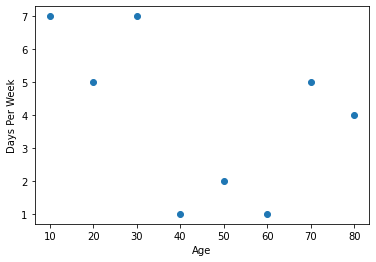

In [3]:
features = list(range(10, 80+1, 10))
features = numpy.array(features).reshape(-1,1) # [[10], [20], ...]
labels = numpy.array([7,5,7,1,2,1,5,4])

_plotting.plot_scatter(features, labels, x_label="Age", y_label="Days Per Week")

## Let's try splitting the data ourselves

#### We'll split the label data at the 6th index, then calculate the MSE

In [4]:
print("Split:", labels[:6], labels[6:])

x_ = 1/8*(
    (7-3.833)**2 +
    (5-3.833)**2 +
    (7-3.833)**2 +
    (1-3.833)**2 +
    (2-3.833)**2 +
    (1-3.833)**2 +
    (5-4.5)**2 +
    (4-4.5)**2)
print(x_)

# Checking our work
print("MSE score:", calculate_mse(labels, 6, numpy.mean))

Split: [7 5 7 1 2 1] [5 4]
5.16666675
MSE score: 5.166666666666667


## Finding the first split by mimizing the MSE

#### Remember, the higher the score, the better the split! But if there's no split, then we should probably continue to find one.

In [5]:
best_mse = float('-inf')
best_index = None
for i in range(len(labels)):
    left = labels[:i]
    right = labels[i:]
    print("*"*10)
    print(left, right)
    print(numpy.mean(left), numpy.mean(right))
    weighted_standard = calculate_weighted_something(labels, i, subtract_mean)
    print("Weighted Standard (MSE):", weighted_standard)
    if best_mse <= weighted_standard: # Continue to find one
        best_mse = weighted_standard
        best_index = i

**********
[] [7 5 7 1 2 1 5 4]
nan 4.0
Weighted Standard (MSE): 5.25
**********
[7] [5 7 1 2 1 5 4]
7.0 3.5714285714285716
Weighted Standard (MSE): 3.9642857142857144
**********
[7 5] [7 1 2 1 5 4]
6.0 3.3333333333333335
Weighted Standard (MSE): 3.916666666666667
**********
[7 5 7] [1 2 1 5 4]
6.333333333333333 2.6
Weighted Standard (MSE): 1.9833333333333334
**********
[7 5 7 1] [2 1 5 4]
5.0 3.0
Weighted Standard (MSE): 4.25
**********
[7 5 7 1 2] [1 5 4]
4.4 3.3333333333333335
Weighted Standard (MSE): 4.983333333333333
**********
[7 5 7 1 2 1] [5 4]
3.8333333333333335 4.5
Weighted Standard (MSE): 5.166666666666667
**********
[7 5 7 1 2 1 5] [4]
4.0 4.0
Weighted Standard (MSE): 5.25


C:\Users\Diego\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Diego\miniconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
print("Best calculated MSE:", best_mse)
print("Calculate MSE (at best index):", calculate_mse(labels, best_index, numpy.mean))

Best calculated MSE: 5.25
Calculate MSE (at best index): 5.25


# Decision trees for Regression
### Remember, regression finds a best fit line (plane). But decision trees will help us find a best-fit discrete line (plane).

In [7]:
model_regressor = sklearn.tree.DecisionTreeRegressor(max_depth=2)
model_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Age <= 35.0\nsquared_error = 5.25\nsamples = 8\nvalue = 4.0'),
 Text(0.25, 0.5, 'Age <= 15.0\nsquared_error = 0.889\nsamples = 3\nvalue = 6.333'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.0\nsamples = 2\nvalue = 6.0'),
 Text(0.75, 0.5, 'Age <= 65.0\nsquared_error = 2.64\nsamples = 5\nvalue = 2.6'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 4.5')]

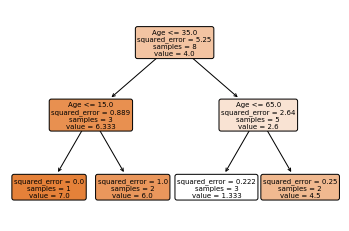

In [8]:
sklearn.tree.plot_tree(model_regressor, feature_names=["Age"], filled=True, rounded=True)

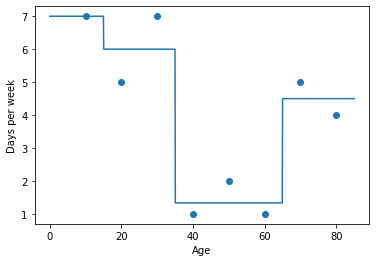

In [9]:
# Our usual function won't work since we have one-dimensional features
def plot_regressor(model, features, labels):
    x = numpy.linspace(0,85,1000)
    plt.scatter(features, labels)
    plt.plot(x, model.predict(x.reshape([-1,1])))
    plt.xlabel("Age")
    plt.ylabel("Days per week")

plot_regressor(model_regressor, features, labels)